# Gases: Perfect and Semiperfect Models

In this Notebook we will use `PerfectIdealGas` and `SemiperfectIdealGas` classes from **pyTurb**, to access the thermodynamic properties with a Perfect Ideal Gas or a Semiperfect Ideal Gas approach. Both classes acquire the thermodynamic properties of different species from the *NASA Glenn coefficients* in `thermo_properties.py`.

Note that `PerfectIdealGas` and `SemiperfectIdealGas` classes are two different approaches for an *Ideal Gas*. 

The `gas_models` functions and classes can be found in the following folders:

- pyturb
    - gas_models
        - thermo_prop
        - PerfectIdealGas
        - SemiperfectIdealGas
        - GasMixture
        
```python
    from pyturb.gas_models import ThermoProperties
    from pyturb.gas_models import PerfectIdealGas
    from pyturb.gas_models import SemiperfectIdealGas
    from pyturb.gas_models import GasMixture
```

For an example about how to declae and use a Gas Mixture in **pyTurb**, go the "Gas Mixtures.ipynb" Notebook.

### Ideal Gas

While an Ideal Gas is characterized by a compressibility factor of 1:

$$Z=1=\frac{pv}{R_gT}$$

Which means that the *Ideal Gas Equation of State* is available: ($pv=R_gT$). It also means that the Mayer Equation is applicable: $R_g=c_p-c_v$.


### Perfect and Semiperfect approaches

A Perfect Gas or a Semiperfect Ideal Gas approach means:
- If the gas is perfect: $c_v, c_p, \gamma_g \equiv constant$
- If the gas is Semiperfect: $c_v(T), c_p(T), \gamma_g(T) \equiv f(T)$

By definition, the model used in `ThermoProperties` provide a 7 coefficients polynomial for the heat capacity at constant pressure ($c_p$):

$$ \frac{c_p}{R_g} = a_1T^{-2}+a_2T^{-1} + a_3 + a_4T + a_5T^2 a_6T^3 + a_7T^4$$

With the $c_p$, the Mayer Equation (valid for $Z=1$) and the heat capacity ratio we can obtain $c_v \left(T\right)$ and $\gamma \left(T\right)$:

$$ R_g =c_p\left(T\right)-c_v \left(T\right) $$

$$\gamma_g\left(T\right) = \frac{c_p\left(T\right)}{c_v\left(T\right)}$$


> In practice, the `PerfectIdealGas` object is a `SemiperfectIdealGas` where the temperature is set to $25ºC$.



### Perfect and Semiperfect content

Both `PerfectIdealGas` and `SemiPerfectIdealGas` classes have the following content:

- **Gas properties:** Ru, Rg, Mg, cp, cp_molar, cv, cv_molar, gamma
- **Gas enthalpies, moles and mass:** h0, h0_molar, mg, Ng
- **Chemical properties:** gas_species, thermo_prop

### Other dependencies:
We will import `numpy` and `pyplot` as well, to make some graphical examples. 

---

### Check Gas Species availability:

In [1]:
from pyturb.gas_models import ThermoProperties

In [2]:
tp = ThermoProperties()
print(tp.species_list[850:875])

['Ni-', 'NiCL', 'NiCL2', 'NiO', 'NiS', 'O', 'O+', 'O-', 'OD', 'OD-', 'OH', 'OH+', 'OH-', 'O2', 'O2+', 'O2-', 'O3', 'P', 'P+', 'P-', 'PCL', 'PCL2', 'PCL2-', 'PCL3', 'PCL5']


In [3]:
tp.is_available('Air')

True

---

### Import Perfect and Semiperfect Ideal Gas classes:

Examples with Air:

In [4]:
from pyturb.gas_models import PerfectIdealGas
from pyturb.gas_models import SemiperfectIdealGas

In [5]:
# Air as perfect gas:
perfect_air = PerfectIdealGas('Air')

# Air as semiperfect gas:
semiperfect_air = SemiperfectIdealGas('Air')

---
##### To retrieve the thermodynamic properties you can `print` the `thermo_prop` from the gas:

Including:
- Chemical formula
- Heat of formation
- Molecular mass
- cp coefficients

In [6]:
print(perfect_air.thermo_prop)

Species: Air	Mg=28.9651784 g/mol	deltaHf_ref=-125.53 J/mol	deltaHf_0K=8649.26 J/mol
-->Chemical formula: {'N': 1.56, 'O': 0.42, 'AR': 0.01, 'C': 0.0}
-->Tinterval: [200.0:1000.0] K
   Coefficients:  order -2  |  order -1  |  order 0  |  order 1  |  order 2  |  order 3  |  order 4
                  1.010e+04   -1.968e+02   5.009e+00  -5.761e-03   1.067e-05  -7.940e-09   2.185e-12

-->Tinterval: [1000.0:6000.0] K
   Coefficients:  order -2  |  order -1  |  order 0  |  order 1  |  order 2  |  order 3  |  order 4
                  2.415e+05   -1.258e+03   5.145e+00  -2.139e-04   7.065e-08  -1.071e-11   6.578e-16




---
You can get the thermodynamic properties directly from the gas object. Note that all units are International System of Units (SI):

In [7]:
print(perfect_air.Rg)
print(perfect_air.Mg)
print(perfect_air.cp())
print(perfect_air.cp_molar())
print(perfect_air.cv())
print(perfect_air.cv_molar())
print(perfect_air.gamma())

287.0502816634901
28.9651784
1004.7188747023865
29.10186144760187
717.6685930388965
20.78739882944863
1.3999760954398244


---
##### Use the docstrings for more info about the content of a PerfectIdealGas or a SemiperfectIdealGas:



In [8]:
perfect_air?

Type:           PerfectIdealGas
String form:    <pyturb.gas_models.perfect_ideal_gas.PerfectIdealGas object at 0x0000021EDED51160>
File:           c:\users\c84184\phd\pyturb-example_notebooks\src\pyturb\gas_models\perfect_ideal_gas.py
Docstring:     
PerfectIdealGas class:
----------------------

Implements a Gas object:
    +gas_species: Species selected. May be a pure substance or any of the molecules and mixes
                  considered in "NASA Glenn Coefficients for Calculating Thermodynamic
                  Properties of Individual Species".
    + Ru: Ideal gas law universal constant  [J/mol/K]
    + Rg: Individual gas constant [J/kg/K]
    + cp: Constant heat capacity at constant pressure [J/kg/K]
    + cv: Constant heat capacity at constant volume [J/kg/K]
    + gamma: Heat capacity ratio [-]
    + cp_molar: Constant molar heat capacity at constant pressure [J/kg/K]
    + cv_molar: Constant molar heat capacity at constant volume [J/kg/K]
    + h0_molar: Assigned molar enthal

---
##### Compare both models:

Note that *Perfect Ideal Air*, with constant $c_p$, $c_v$ and $\gamma$, yields the same properties than a semiperfect gas model at 25ºC (reference temperature):

In [9]:
T = 288.15 #K
cp_perf = perfect_air.cp()
cp_sp = semiperfect_air.cp(T)

print('At T={0:8.2f}K, cp_perfect={1:8.2f}J/kg/K'.format(T, cp_perf))
print('At T={0:8.2f}K, cp_semipft={1:8.2f}J/kg/K'.format(T, cp_sp))

T = 1500 #K
cp_perf = perfect_air.cp()
cp_sp = semiperfect_air.cp(T)

print('At T={0:8.2f}K, cp_perfect={1:8.2f}J/kg/K'.format(T, cp_perf))
print('At T={0:8.2f}K, cp_semipft={1:8.2f}J/kg/K'.format(T, cp_sp))

At T=  288.15K, cp_perfect= 1004.72J/kg/K
At T=  288.15K, cp_semipft= 1004.27J/kg/K
At T= 1500.00K, cp_perfect= 1004.72J/kg/K
At T= 1500.00K, cp_semipft= 1210.97J/kg/K


---
##### $c_p$, $c_v$ and $\gamma$ versus temperature:

In [10]:
import numpy as np
from matplotlib import pyplot as plt

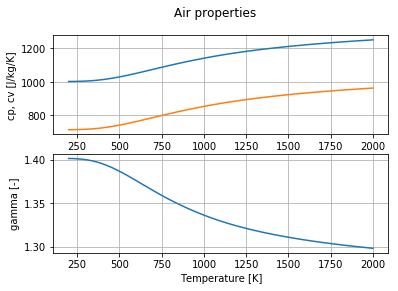

In [11]:
T = np.linspace(200, 2000, 50)
cp = np.zeros_like(T)
cv = np.zeros_like(T)
gamma = np.zeros_like(T)

for ii, temperature in enumerate(T):
    cp[ii] = semiperfect_air.cp(temperature)
    cv[ii] = semiperfect_air.cv(temperature)
    gamma[ii] = semiperfect_air.gamma(temperature)
    
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Air properties')
ax1.plot(T, cp)
ax1.plot(T, cv)
ax2.plot(T, gamma)

ax1.set(xlabel="Temperature [K]", ylabel="cp, cv [J/kg/K]")
ax2.set(xlabel="Temperature [K]", ylabel="gamma [-]")
ax1.grid()
ax2.grid()
plt.show()
